`fapy`
=====

# Introduction

A little Python 3 module for finite automata theory and regular expressions.

# Simple automata fun

In [1]:
from fapy.finite_automaton import FiniteAutomaton

In `fapy`, all automata are non deterministic. Being deterministic is a _property_. The same goes for being complete, or epsilon-transition free.

We start by defining a simple automaton accepting all words containing at least an `a`.

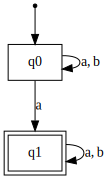

In [2]:
automaton1 = FiniteAutomaton(
    alphabet={'a', 'b'},
    states={'q0', 'q1'},
    initial_states={'q0'},
    accepting_states={'q1'},
    transitions={
        'q0': [('a', 'q0'), ('b', 'q0'), ('a', 'q1')],
        'q1': [('a', 'q1'), ('b', 'q1')]
    }
)
automaton1.draw()

Let's run some tests

In [3]:
problems = [
    ('', False),
    ('a', True),
    ('b', False),
    ('bb', False),
    ('bbabb', True)
]
for problem, solution in problems:
    print(f'Word: "{"".join(problem)}", Output: {automaton1.read(problem)}, Expected: {solution}.')

Word: "", Output: False, Expected: False.
Word: "a", Output: True, Expected: True.
Word: "b", Output: False, Expected: False.
Word: "bb", Output: False, Expected: False.
Word: "bbabb", Output: True, Expected: True.


# Regular expressions

They exist.

In [4]:
from fapy.regular_expression import (
    parse_regular_expression,
    RegularExpression
)

reg = parse_regular_expression("(a + b)* a")
print(reg)

(a + b)* a


## Residuals

In [5]:
from fapy.algorithm_residual import residual

print(residual(parse_regular_expression("(a + abb) (bba)* c"), "abb"))

((b b a)* + a (b b a)*) c


# Algorithms

We have some algorithms!

## Determinization

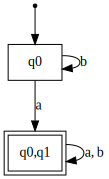

In [6]:
from fapy.algorithms import powerset_determinize

automaton1_det = powerset_determinize(automaton1)
automaton1_det.draw()

## Thompson's algorithm

It transforms a regular expression into an automaton by induction on the syntax tree of the regular expression.


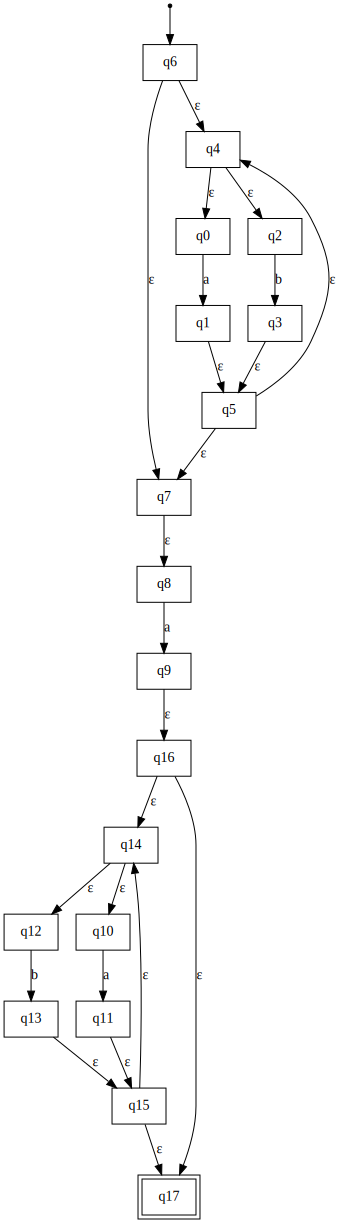

In [7]:
from fapy.algorithms import thompson

alphabet = {'a', 'b'}
automaton = thompson(
    parse_regular_expression('(a + b)* a (a + b)*'),
    alphabet
)
automaton.draw()

# Glushkov's algorithm

It transforms a regular expression into an equivalent automaton.

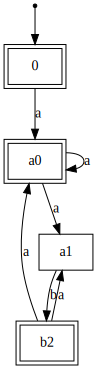

In [8]:
from fapy.algorithms import glushkov

automaton = glushkov(parse_regular_expression('(a (ab)*)*'))
automaton.draw()

# Brozozwski's algorithm

It transforms a finite automaton into an equivalent regular expression.

(a a a)* b


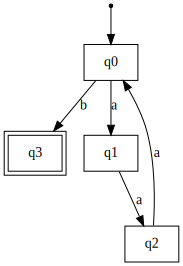

In [9]:
from fapy.algorithms import brozozwski

automaton = FiniteAutomaton(
    alphabet={'a', 'b'},
    states={'q0', 'q1', 'q2', 'q3'},
    initial_states={'q0'},
    accepting_states={'q3'},
    transitions={
        'q0': [('a', 'q1'), ('b', 'q3')],
        'q1': [('a', 'q2')],
        'q2': [('a', 'q0')]
    }
)
print(brozozwski(automaton))
automaton.draw()

# Brozozwski's minimization algorithm

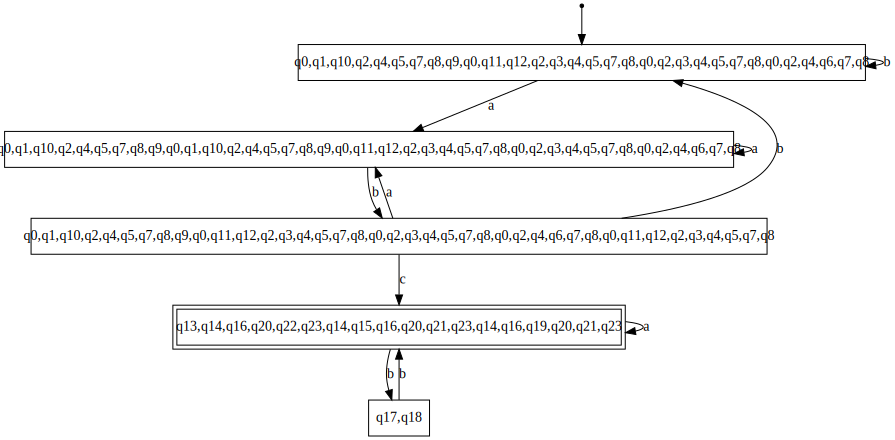

In [10]:
from fapy.algorithms import brozozwski_minimize

alphabet = {'a', 'b', 'c'}
automaton = thompson(
    parse_regular_expression('(a + b)* a b c (a + bb)*'),
    alphabet
)
minimized_automaton = brozozwski_minimize(automaton)
minimized_automaton.draw()